# Подготовка среды для работы

Скачиваем Python

Скачиваем свежую версию R: https://cran.r-project.org/bin/windows/base/

Скачиваем VS Code: https://code.visualstudio.com/

Устанавливаем Jupyter: https://pypi.org/project/jupyter/

https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter

Добавьте путь к jupyter.exe в переменную среды PATH

Запускаем в папке с R консоль и пишем магические команды:
```
R
install.packages("languageserver")
install.packages('devtools')
devtools::install_github('IRkernel/IRkernel’)
IRkernel::installspec()
```

# Загружаем данные

Установка пакета quantmod, если он еще не установлен

In [ ]:
if (!requireNamespace("quantmod", quietly = TRUE)) {
  install.packages("quantmod")
}

In [ ]:
library(quantmod)

In [ ]:
ticker <- "AAPL"  # Пример для акций Apple
start_date <- "2022-01-01"
end_date <- Sys.Date()

## Yahoo

In [5]:
getSymbols(ticker, src = "yahoo", from = start_date, to = end_date)

[1] "AAPL"

In [6]:
# Ваш набор данных теперь доступен с именем тикера (в данном случае, "AAPL")
# Например, для вывода первых нескольких строк данных:
head(AAPL)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2022-01-03    177.83    182.88   177.71     182.01   104487900      179.9539
2022-01-04    182.63    182.94   179.12     179.70    99310400      177.6700
2022-01-05    179.61    180.17   174.64     174.92    94537600      172.9440
2022-01-06    172.70    175.30   171.64     172.00    96904000      170.0570
2022-01-07    172.89    174.14   171.03     172.17    86709100      170.2251
2022-01-10    169.08    172.50   168.17     172.19   106765600      170.2448

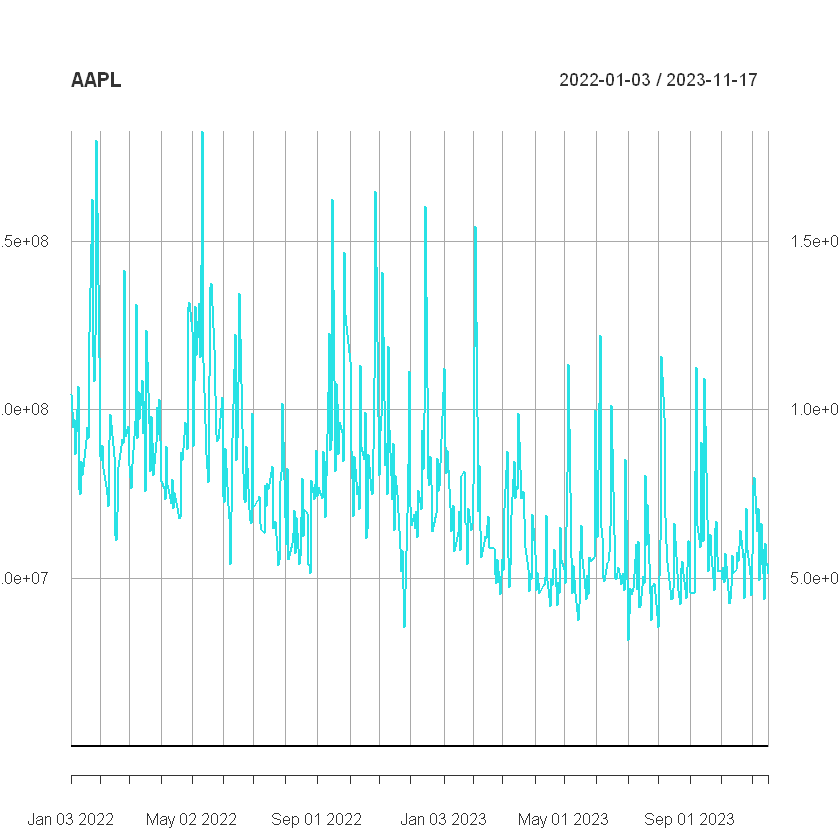

In [7]:
plot(AAPL)

## Google

Пример из предоставленной нам методички не работает

In [9]:
getSymbols.google('MSFT', verbose=TRUE)

ERROR: Error: 'getSymbols.google' is defunct.
Google Finance stopped providing data in March, 2018.
You could try setting src = "yahoo" instead.
See help("Defunct") and help("quantmod-defunct")


Попробуем другой вариант

In [10]:
# Установка пакета tidyquant, если он еще не установлен
if (!requireNamespace("tidyquant", quietly = TRUE)) {
  install.packages("tidyquant")
}

# Загрузка пакета tidyquant
library(tidyquant)

also installing the dependencies 'shape', 'future.apply', 'numDeriv', 'progressr', 'SQUAREM', 'diagram', 'lava', 'bit', 'prodlim', 'globals', 'listenv', 'parallelly', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'bit64', 'rematch', 'clock', 'gower', 'hardhat', 'ipred', 'furrr', 'crosstalk', 'data.table', 'warp', 'BH', 'colorspace', 'fracdiff', 'lmtest', 'tseries', 'urca', 'RcppArmadillo', 'RcppRoll', 'future', 'blob', 'DBI', 'gargle', 'ids', 'selectr', 'generics', 'timechange', 'quadprog', 'gtable', 'isoband', 'scales', 'hms', 'vroom', 'tzdb', 'cellranger', 'progress', 'recipes', 'rsample', 'forcats', 'plotly', 'padr', 'slider', 'anytime', 'forecast', 'tsfeatures', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'haven', 'modelr', 'reprex', 'rvest', 'lubridate', 'PerformanceAnalytics', 'dplyr', 'ggplot2', 'Quandl', 'riingo', 'readr', 'readxl', 'alphavantager', 'tidyr', 'timetk', 'timeDate', 'tidyverse', 'tidyselect'




package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisL

Loading required package: lubridate


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics


Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend




In [13]:
# Использование функции tq_get для загрузки данных
google_data <- tq_get(ticker, from = start_date, to = end_date, get = "google")

# Вывод первых нескольких строк данных
head(google_data)

NULL

Данный вариант также не принёс успехов

## OANDA

Опять поражение в связи с отсутствием API_TOKEN

In [21]:
# Указание параметров для подключения к OANDA
oanda_token <- "YOUR_OANDA_API_TOKEN"  # Замените YOUR_OANDA_API_TOKEN своим токеном, которые вы не получите из РФ
currency_pair <- "EURUSD"  # Пример для евро к доллару

# Указание временного периода
start_date <- "2022-01-01"
end_date <- Sys.Date()

getSymbols(Symbols = currency_pair, src = "oanda",
           from = start_date, to = end_date,
           token = oanda_token)

[1] "USD/EUR"

## FRED

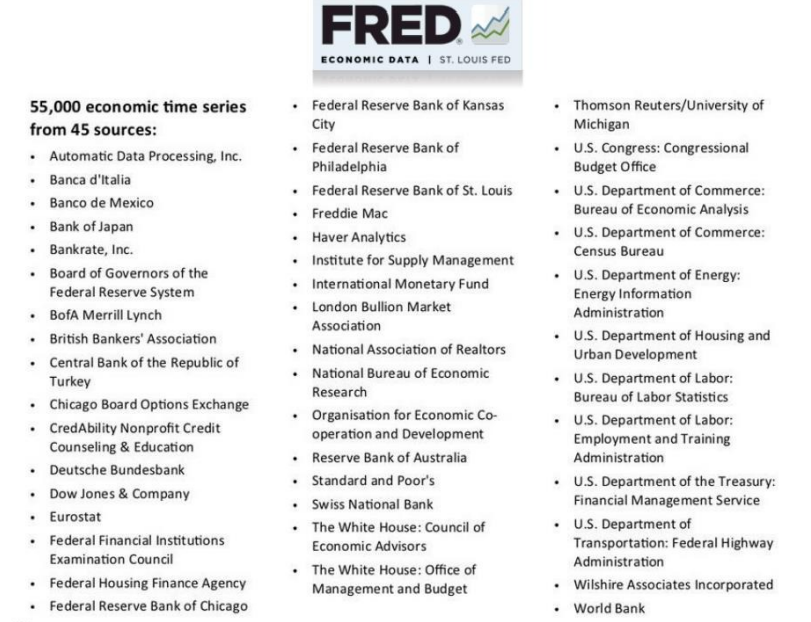

In [22]:
getSymbols('CPIAUCNS', src = "FRED")

[1] "CPIAUCNS"

In [24]:
head(CPIAUCNS)

           CPIAUCNS
1913-01-01      9.8
1913-02-01      9.8
1913-03-01      9.8
1913-04-01      9.8
1913-05-01      9.7
1913-06-01      9.8

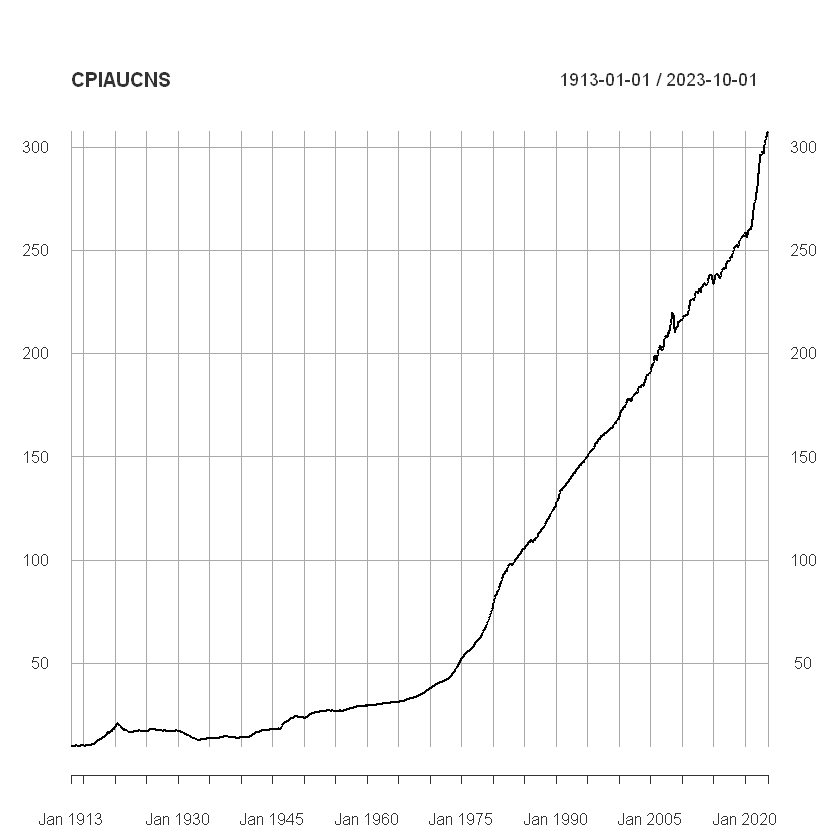

In [25]:
plot(CPIAUCNS)

## Finam

### rusquant

Примеры работы с пакетом: https://github.com/arbuzovv/rusquant

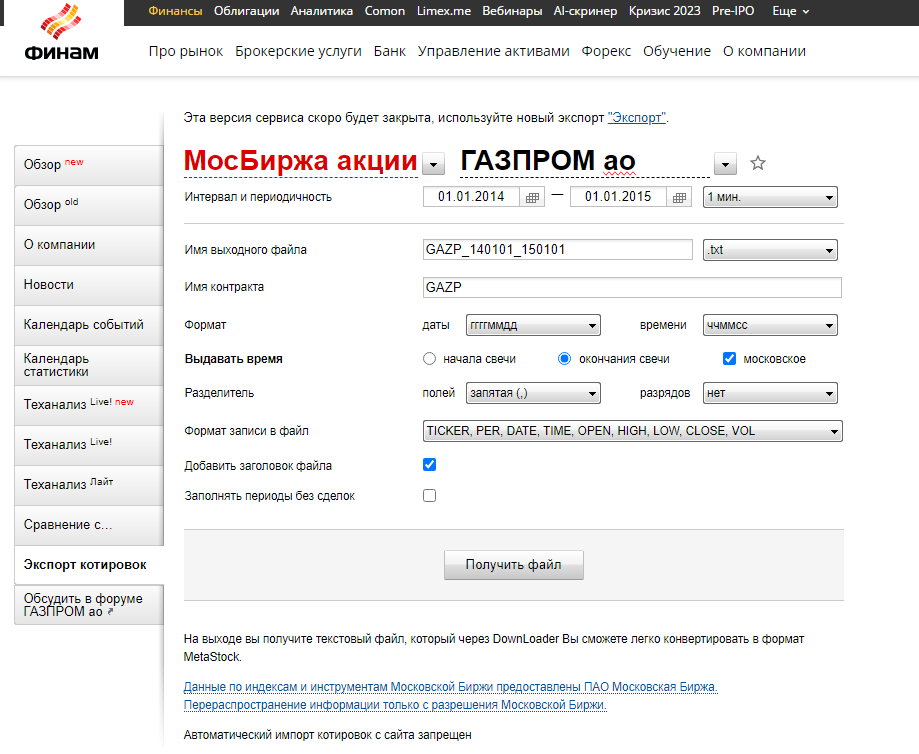

In [27]:
if (!requireNamespace("rusquant", quietly = TRUE)) {
  install.packages("rusquant")
}

also installing the dependencies 'XML', 'jose'




package 'XML' successfully unpacked and MD5 sums checked
package 'jose' successfully unpacked and MD5 sums checked
package 'rusquant' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Skiv2\AppData\Local\Temp\Rtmp4CoWC2\downloaded_packages


In [30]:
library(rusquant)

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:xts':

    first, last


Loading required package: jsonlite

Loading required package: httr


Attaching package: 'rusquant'


The following objects are masked from 'package:quantmod':

    getDividends, getSplits




In [37]:
# Период может быть различным: 1min, 5min, 10min, 15min, 30min, hour, day, week, month
# Имя котировки смотрим в поле имя контракта или так getSymbolList('Finam')
sber <- getSymbols.Moex('SBER')

In [38]:
head(sber)

open,close,high,low,value,volume,begin,end,timestamp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dttm>,<dttm>,<dttm>
109.0,109.20,111.11,108.01,2211623351,20252489,2007-07-20,2007-07-20 23:59:59,2007-07-20
109.7,112.00,112.65,108.10,3901828829,35092029,2007-07-23,2007-07-23 23:59:59,2007-07-23
112.1,109.53,113.05,109.47,3536964241,31762001,2007-07-24,2007-07-24 23:59:59,2007-07-24
108.5,109.63,109.98,107.10,4300852582,39700937,2007-07-25,2007-07-25 23:59:59,2007-07-25
110.0,104.18,110.42,103.30,5299122988,49871205,2007-07-26,2007-07-26 23:59:59,2007-07-26
102.0,102.41,103.83,100.81,5496358262,53701139,2007-07-27,2007-07-27 23:59:59,2007-07-27


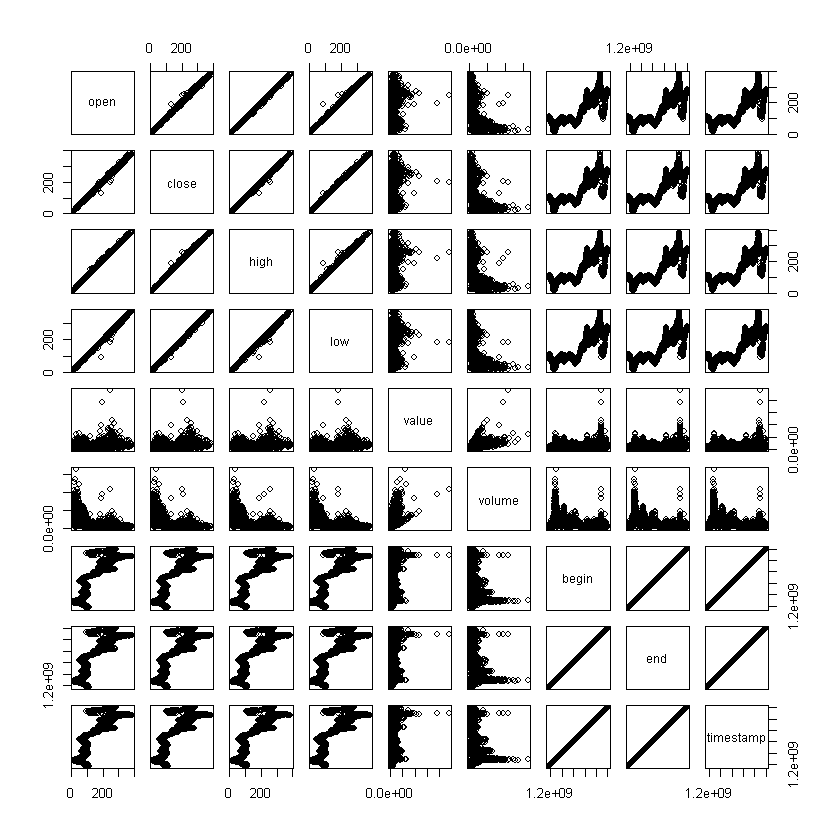

In [39]:
plot(sber)

### RSelenium

Selenium - это инструмент для автоматизации веб-браузеров. Он предоставляет программный интерфейс для взаимодействия с браузерами, позволяя разработчикам автоматизировать действия, которые обычно выполняются вручную при тестировании веб-приложений. Selenium поддерживает различные языки программирования, такие как Java, Python, C#, Ruby, и другие, что делает его гибким инструментом для разработчиков.

Основное применение Selenium - это автоматизация тестирования веб-приложений, проверка их функциональности, производительности и стабильности. Однако Selenium также используется для веб-скрапинга, автоматизации повседневных задач в веб-браузерах и других сценариев, связанных с взаимодействием с веб-сайтами.

Selenium может работать с различными браузерами, такими как Chrome, Firefox, Safari, и другими, что делает его удобным инструментом для кросс-браузерного тестирования.

Данный вариант не будет тут реализован из-за сложности его реализации, но это реально! Смотри пример тут: https://github.com/SkivHisink/JavaEduNSU/tree/main/LabWork2

## DataMarket

http://datamarket.com/

In [40]:
if (!requireNamespace("rdatamarket", quietly = TRUE)) {
  install.packages("rdatamarket")
}

Warning message:
"package 'rdatamarket' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


К сожалению, для новых  версий R данный вариант не подходит.

## Bloomberg

In [41]:
if (!requireNamespace("RBloomberg", quietly = TRUE)) {
  install.packages("RBloomberg")
}

Warning message:
"package 'RBloomberg' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


К сожалению, для новых  версий R данный вариант не подходит.

## Twitter (or X)

In [44]:
if (!requireNamespace("twitteR", quietly = TRUE)) {
  install.packages("twitteR")
}

also installing the dependency 'rjson'




package 'rjson' successfully unpacked and MD5 sums checked
package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Skiv2\AppData\Local\Temp\Rtmp4CoWC2\downloaded_packages


In [46]:
library('twitteR')
searchTwitter("#rstats", n = 300)

ERROR: Error in get_oauth_sig(): OAuth has not been registered for this session


Нужен ключик. Готов платить?
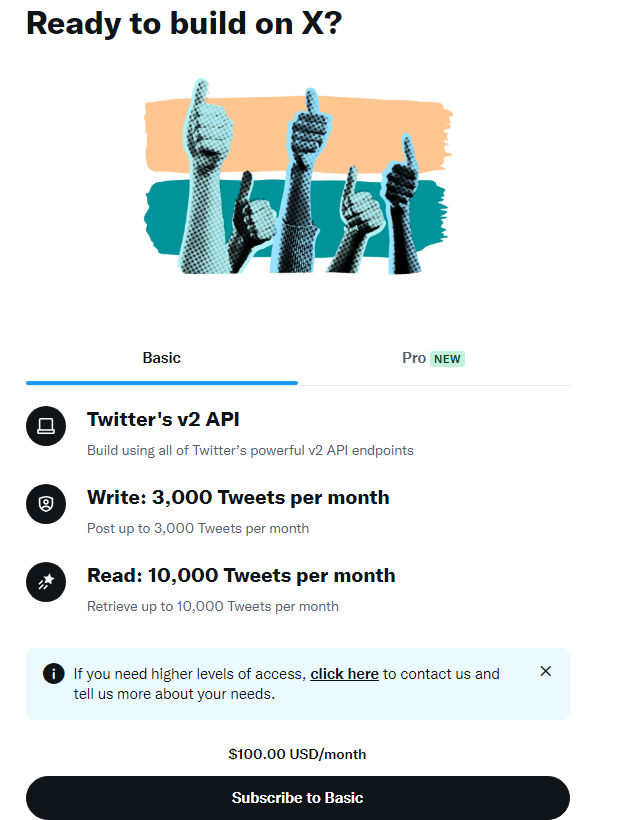
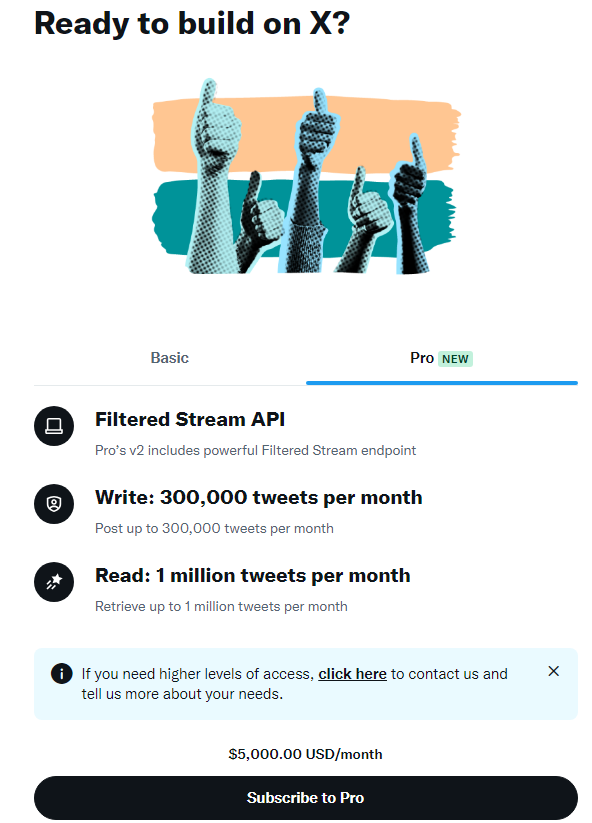

Нам повезло, есть бесплатная, но урезанная версия

In [48]:
# Указание ключей API Twitter (полученных при создании приложения на https://developer.twitter.com/)
app_key <- "YOUR_APP_KEY"
app_secret <- "YOUR_APP_SECRET"
access_token <- "YOUR_ACCESS_TOKEN"
access_secret <- "YOUR_ACCESS_SECRET"
bearer_token <- "YOUR_BEARER_TOKEN"

# Установка ключей API
Sys.setenv(BEARER_TOKEN = bearer_token)

In [49]:
install.packages("httr")
install.packages("jsonlite")
install.packages("dplyr")

Warning message:
"package 'httr' is in use and will not be installed"
Warning message:
"package 'jsonlite' is in use and will not be installed"


package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\Program Files\R\R-4.3.2\library\00LOCK\dplyr\libs\x64\dplyr.dll to D:\Program Files\R\R-4.3.2\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\Skiv2\AppData\Local\Temp\Rtmp4CoWC2\downloaded_packages


In [50]:
require(httr)
require(jsonlite)
require(dplyr)

Loading required package: dplyr


######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#     

In [51]:
bearer_token <- Sys.getenv("$BEARER_TOKEN")
headers <- c(`Authorization` = sprintf('Bearer %s', bearer_token))

In [52]:
# Установка пакета rtweet, если он еще не установлен
if (!requireNamespace("rtweet", quietly = TRUE)) {
  install.packages("rtweet")
}

# Загрузка пакета rtweet
library(rtweet)


  There is a binary version available but the source version is later:
       binary source needs_compilation
rtweet  1.1.0  1.2.1             FALSE



installing the source package 'rtweet'



Attaching package: 'rtweet'


The following object is masked from 'package:twitteR':

    lookup_statuses


The following object is masked from 'package:jsonlite':

    flatten




In [61]:
# Установка ключей API
setup_twitter_oauth(consumer_key = app_key, consumer_secret = app_secret, access_token = access_token, access_secret = access_secret)

[1] "Using direct authentication"


In [66]:
auth_setup_default(credential = list(consumer_key = app_key, access_token = access_token))

ERROR: Error in auth_setup_default(credential = list(consumer_key = app_key, : unused argument (credential = list(consumer_key = app_key, access_token = access_token))


In [62]:
# Задание параметров поиска
search_query <- "#rstats"  # Пример: поиск твитов с хештегом #rstats
num_tweets <- 100  # Количество твитов для загрузки

# Поиск твитов
tweets <- search_tweets(q = search_query, n = num_tweets)

# Вывод первых нескольких твитов
head(tweets)

ERROR: [1m[33mError[39m in `default_cached_auth()`:[22m
[33m![39m No default authentication found. Please call `auth_setup_default()`


In [63]:
df <- search_tweets("#rstats", token = auth)

ERROR: [1m[33mError[39m in `default_cached_auth()`:[22m
[33m![39m No default authentication found. Please call `auth_setup_default()`


Ну в общем должно на самом деле работать, но, к сожалению, не разобрались как оно работает

## rfishbase

In [67]:
if (!requireNamespace("rfishbase", quietly = TRUE)) {
  install.packages("rfishbase")
}

also installing the dependencies 'duckdb', 'contentid'




package 'duckdb' successfully unpacked and MD5 sums checked
package 'contentid' successfully unpacked and MD5 sums checked
package 'rfishbase' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Skiv2\AppData\Local\Temp\Rtmp4CoWC2\downloaded_packages


In [74]:
library(rfishbase)

In [81]:
fb_tbl("ecosystem")

autoctr,E_CODE,EcosystemRefno,Speccode,Stockcode,Status,CurrentPresence,Abundance,LifeStage,Remarks,Entered,Dateentered,Modified,Datemodified,Expert,Datechecked,WebURL,TS
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dttm>,<int>,<dttm>,<int>,<dttm>,<chr>,<dttm>
1,1,50628,549,565,native,Present,NA,adults,NA,10,2007-11-12,NA,2007-11-12,NA,NA,NA,NA
2,1,189,552,568,native,Present,NA,adults,NA,2,1990-11-12,1,1998-10-12,97,NA,NA,NA
3,1,189,554,570,native,Present,NA,adults,NA,2,1990-10-19,1,1998-10-12,NA,NA,NA,NA
4,1,79732,873,889,native,Present,NA,adults,NA,10,2008-11-28,NA,2008-11-28,NA,NA,NA,NA
5,1,5217,948,964,native,Present,NA,adults,NA,2,1990-10-19,1,1998-10-12,NA,NA,NA,NA
7,1,39852,956,972,native,Present,NA,adults,NA,97,2001-09-12,NA,2001-09-12,NA,NA,NA,NA
8,1,39852,957,973,native,Present,NA,adults,NA,97,2001-09-12,NA,2001-09-12,NA,NA,NA,NA
9,1,39852,958,974,native,Present,NA,adults,NA,97,2001-09-12,NA,2001-09-12,NA,NA,NA,NA
10,1,188,1526,1719,native,Present,NA,adults,NA,2,1990-11-12,1,1998-10-12,NA,NA,NA,NA


## ggplot2

In [82]:
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

In [83]:
library("ggplot2")

### Машины

In [84]:
data(mpg, package = "ggplot2")

In [85]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


###  Экономические временные ряды США с 1967 по 2007

In [86]:
data(economics, package = "ggplot2")

In [87]:
economics

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018
1968-01-01,530.9,199808,11.7,5.1,2878
1968-02-01,533.6,199920,12.3,4.5,3001
1968-03-01,544.3,200056,11.7,4.1,2877


## datasets

### Землятрясения

In [88]:
data(quakes, package = "datasets")

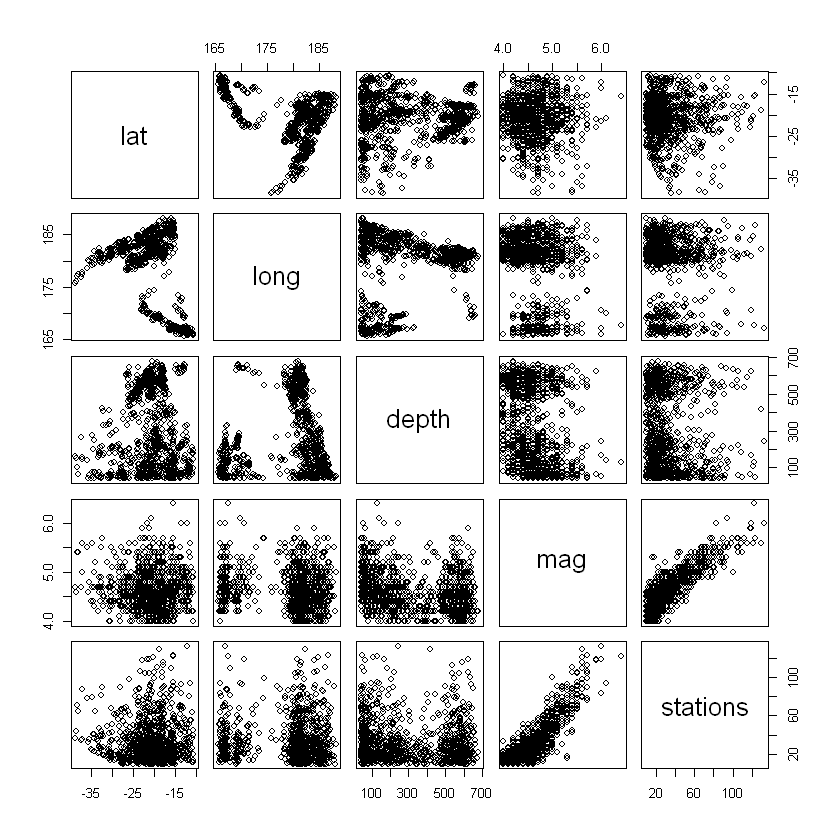

In [89]:
plot(quakes)

### Дистанции между городами Европы

In [90]:
data(eurodist, package = "datasets")

In [91]:
eurodist

                Athens Barcelona Brussels Calais Cherbourg Cologne Copenhagen
Barcelona         3313                                                       
Brussels          2963      1318                                             
Calais            3175      1326      204                                    
Cherbourg         3339      1294      583    460                             
Cologne           2762      1498      206    409       785                   
Copenhagen        3276      2218      966   1136      1545     760           
Geneva            2610       803      677    747       853    1662       1418
Gibraltar         4485      1172     2256   2224      2047    2436       3196
Hamburg           2977      2018      597    714      1115     460        460
Hook of Holland   3030      1490      172    330       731     269        269
Lisbon            4532      1305     2084   2052      1827    2290       2971
Lyons             2753       645      690    739       789     7

# И это только начало...